# Notes

## Linear Model

In [2]:
# example of model y=ax+b. Find w = [a,b]^T and compute prediction x=5

import numpy as np

# setup model in standard format
X = np.array([[1,1], [1,3], [1,4]]) # adding a ones-column to account for offset
y = np.array([2,5,6])

# compute weights
w_star = np.linalg.inv(X.T @ X)@X.T@y

# compute y
input = [1,5]
y = input@w_star
y

7.499999999999998

In [113]:
1/2, 1/10, 2/5

(0.5, 0.1, 0.4)

## Association Mining

$support=\frac{X}{\lvert T \rvert}$

Support for an $item > 40\%$ means $0.4 \times \lvert T \rvert$ must be satisfied.

$confidence=\frac{support(X\bigcup Y)}{support(X)}$

### Apriori Algorithm
Given new candidate itemssets $c$ in C for $L_k$.
If $L_{k-1}$ does not contain a subset $s$ present in one of the $c$ itemsets. Then that $c$ is not considered.

## Naïve Bayes Classifier

$p\left(y \mid x_{1}, x_{2}, \ldots, x_{M}\right)=\frac{p\left(x_{1}, x_{2}, \ldots, x_{M} \mid y\right) p(y)}{\sum_{k=0}^{K-1} p\left(x_{1}, x_{2}, \ldots, x_{M} \mid y=k\right) p(y=k)}$

## AUC

$TPR / Recall / Sensitivity =\frac{\text { TP }}{\text { TP }+\text { FN }}$

$Specificity=\frac{\text { TN }}{\text { TN + FP }}$

FPR = $1 - Specificity=\frac{F P}{T N+F P}$

Total number of positive examples: $TP + FN$

Total number of negative examples: $FP + TN$

In [2]:
# compute AUC
from sklearn import metrics
y = np.array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1])
pred = np.array([5.7, 6.0, 6.2, 6.3, 6.4, 6.6, 6.7, 6.9, 7.0, 7.4])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)
metrics.auc(fpr, tpr), thresholds

(0.7500000000000001, array([8.4, 7.4, 6.9, 6.4, 5.7]))

In [114]:
1/(1+3)

0.25

## Gaussian Mixture Model

In [20]:
import numpy as np
from sklearn.mixture import GaussianMixture
X = np.array([[24.2, 39.4]]).T
gm = GaussianMixture(n_components=1, random_state=0).fit(X)
gm.means_, gm._e_step(X), gm._m_step

#gm.predict([[0, 0], [12, 3]])

(array([[24.2],
        [39.4]]),
 (5.295669565217522,
  array([[ 0.0000e+00, -1.1552e+08],
         [-1.1552e+08,  0.0000e+00]])),
 <bound method GaussianMixture._m_step of GaussianMixture(n_components=2, random_state=0)>)

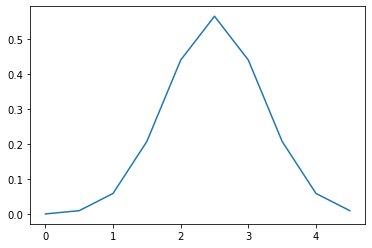

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

x = np.linspace(0, 5, 10, endpoint=False)
y = multivariate_normal.pdf(x, mean=2.5, cov=0.5)
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(x, y)


## Similarity

In [86]:
r = np.array([[0,0,1,0,0,1,0,1]])
s = np.array([[0,1,0,0,0,1,0,1]])



def jaccard(x,y):
  #x = np.asarray(x, np.bool) # Not necessary, if you keep your data
  #y = np.asarray(y, np.bool) # in a boolean array already!
  return np.double(np.bitwise_and(x, y).sum()) / x.size - np.double(np.bitwise_or(x, y).sum())

def smc(x,y):
  return np.double(np.bitwise_and(x,y).sum() + np.bitwise_not(x,y).sum()) / x.size


from sklearn.metrics.pairwise import cosine_similarity

print(f"SMC: {smc(r,s)}")
print(f"Jaccard: {jaccard(r,s)}")
print(f"CosineSimilarity: {cosine_similarity(r,s)}")

SMC: -1.125
Jaccard: 8.0
CosineSimilarity: [[-0.84016805]]


In [88]:
o1 = np.array([[0,0,0,1,0,0,0,1]]) 
o2 = np.array([[0,0,1,0,0,1,0,1]])
o3 = np.array([[0,0,1,0,0,1,0,1]])
o4 = np.array([[0,1,0,0,0,1,0,1]])

smc(o2,o4), cosine_similarity(o1,o2), jaccard(o4,o2)

(-1.125, array([[0.40824829]]), 8.0)


## k-means

In [99]:
from sklearn.cluster import KMeans
x = np.array([[0.4,1.7,3.7,4.6]]).T

kmeans = KMeans(n_clusters=3).fit(x)
#kmeans = KMeans(n_clusters=2, init=np.array([[x.mean]]).T).fit(x)

kmeans.cluster_centers_, kmeans.labels_

(array([[0.4 ],
        [4.15],
        [1.7 ]]),
 array([0, 2, 1, 1], dtype=int32))

In [105]:
x = np.array([0.4,1.7,3.7,4.6])

np.array([4.7,3.7,0.4]).mean()

2.625

In [106]:
8*-np.sqrt(3/20)+np.sqrt(3/20)**2

-2.9483866769659337

## KNN

In [7]:
# find k-nearest neighbours
from sklearn.neighbors import NearestNeighbors
samples = np.array([[]]).T
neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(samples)
neigh.kneighbors([[7.4]])

# compute densities and average relative densities (modify K and arrays)
K = 3
(d1, d2, d3) = (1/K * np.array([0.1,0.3,0.4])).sum()**-1, (1/K*np.array([0.1,0.2,0.3])).sum()**-1, (1/K*np.array([0.1,0.2,0.3])).sum()**-1
di = (1/K * np.array([0.4, 0.5, 0.7])).sum()**-1
ard = di/(1/K*np.array([d1,d2,d3])).sum()
ard

0.4090909090909091

In [19]:
K = 3
(1/K * np.array([24.2, 37.7, 38.5])).sum()**-1

0.01433349259436216

## PCA

In [7]:
# variance explained
def variance_explained(S, S_sub):
    var_expl_pca = (S_sub**2).sum() / sum(S**2)
    print("$Var_{Expl} Range$: ", var_expl_pca)

S = np.array([43.4, 23.39, 18.26, 9.34, 2.14]) # s_i

# modify range
S_sub = S[0]
print(f"Selected values: {S_sub}")
variance_explained(S, S_sub)

Selected values: 43.4
$Var_{Expl} Range$:  0.6595340745907701


## Decision Trees

**Impurity Gain**
$\Delta=I(r)-\sum_{k=1}^{K} \frac{N\left(v_{k}\right)}{N(r)} I\left(v_{k}\right)$

And then the 3 measure methods. See the image in this directory..




In [9]:
# Example of Impurity gain using Gini
I_r = 1-pow(5/15, 2)-pow(10/15, 2) # N(r) = 15
I_1 = 1-pow(1/5, 2)-pow(4/5, 2) # N(v1) = 5
I_2 = 1-pow(4/10, 2)-pow(6/10, 2) # N(v2) = 10

Impurity_Gain = I_r-5/15*I_1-10/15*I_2
Impurity_Gain

0.017777777777777892

In [65]:
I_r = 1-pow(1/11, 2)-pow(4/11, 2) # N(r) = 15
I_1 = 1-pow(1/5, 2)-pow(4/5, 2) # N(v1) = 5
I_2 = 1-pow(4/10, 2)-pow(6/10, 2) # N(v2) = 10

Impurity_Gain = I_r#-5/15*I_1-10/15*I_2
Impurity_Gain

0.859504132231405

In [62]:
136/1815, 436/1815, 3/11, 1379/1815

(0.07493112947658402,
 0.24022038567493112,
 0.2727272727272727,
 0.7597796143250689)

In [121]:
x = np.array([
    1/8,
    1/8,
    1/8,
    1/8,
    1/8,
    1/8,
    1/8,
    1/8])


8

20% Dtest
80% DTrain

In [124]:
0.2*1000

200.0

## Adaboost

error rate
$\epsilon_{t}=\sum_{i=1}^{N} w_{i}(t)\left(1-\delta_{f_{t}\left(\boldsymbol{x}_{i}\right), y_{i}}\right)$ where $\delta_{a, b}=\left\{\begin{array}{ll}1 & \text { if } a=b \\ 0 & \text { if } a \neq b\end{array}\right.$

importance of classifier
$\alpha_{t}=\frac{1}{2} \log \frac{1-\epsilon_{t}}{\epsilon_{t}}$

## Decision Boundaries (how to interpret)
- Linear boundaries: Multinomial Regression
- Smooth curvy boundaries: ANN
- Axis aligned boundaries: Classification Tree
- Complex non-smooth boundaries: 3-nearest neighbours

# Scratchbook